# Hausarbeit im Teilmodul Datamining - Prüfungsabgabe
Autoren mit Mtrikelnummern: Mahmoud Alnasouh (1584420) und Muhammad Farras Shafwan Rindy Sasono (1584433).

# Einleitung
Die Hauptaufgabe ist herauszufinden, ob es einen Zusammenhang zwischen thalachh(Herzschlag) und Input (die Wahrscheinlichkeit ein Herzinfarkt zu bekommen) gibt. Der genutzte Datensatz ist [hier](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) zu finden. Die Methoden, die wir hier verwendet haben, haben wir unten einzeln erläutert und durchgeführt.

Zu Beginn haben wir die benötigte Bibliotheken importiert.

pandas as pd: zur Verarbeitung und Analyse von Daten in der Programmiersprache Python

numpy as np: die erweitert Programmiersprache um Funktionen für numerische Berechnungen und mathematische Routinen.

seaborn as sns: ermöglicht es, mit einfacher Syntax anschauliche Datenvisualisierungen zu erzeugen.

matplotlib.pyplot as plt: kann man Diagramme und Darstellungen in verschiedenen Formaten erzeugen

statsmodels.formula.api as smf: mit dem können Daten untersucht, statistische Modelle schätzen und statistische Tests durchgwführt werden.

sklearn.model_selection import train_test_split: zum Aufteilen von Datenarrays in zwei Teilmengen: für Trainingsdaten und für Testdaten

Sklearn.linear_model import LogisticRegression: wird für logesticsRegression angewendet.

sklearn.metrics import accuracy_score: 

sklearn.metrics import confusion_matrix: 

%matplotlib inline: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Hier haben wir erstmal unseren Datensatz importiert.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


Danach haben wir hier den Datensatz einlesen lassen.

In [3]:
herz = pd.read_csv('heart.csv')

Hier wie es zu sehen ist, haben wir unseren Datensatz ausgeben lassen. Unserer Datensatz beinhaltet mehrere Spalten aber für unsere Tests sind die drei Spalten (age, thalachh(Herzschlag) und output(die Wahrscheinlichkeit, ob es ein Herzinfarkt entsteht)) relevant. 

In [4]:
herz.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Hier ist unser Streudiagramm. Je höher thalachh(Herzschlag) ist und weniger das Alter ist, desto höher die Wahrscheinlichkeit, dass man Herzinfarkt bekommt.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(64.45, 208.55)

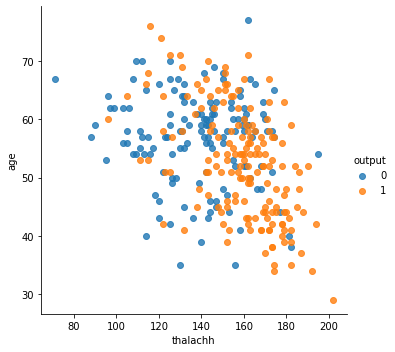

In [5]:
sns.lmplot('thalachh', 'age', data=herz, hue='output', fit_reg=False)
plt.ylim()
plt.xlim()

Hier ist logistische Funktion. Hier wird die Spalte "ourput" untersucht (ob die Wahrscheinlichkeit besteht, dass man ein Herzinfarkt bekommt oder nicht) in Abhängigkeit von thalachh(Herzschlag). Mit fit() wird das Model optimiert.

In [6]:
ergebnisse = smf.logit('output ~ thalachh', data=herz).fit()

Optimization terminated successfully.
         Current function value: 0.592833
         Iterations 5


Wenn p > 0,05 ist, dann gibt es keine Abhängigkeit zwischen thalachh(Herzschlag) und output(dass man ein Herzinfarkt bekommt). in unserem Fall ist p < 0,05 und somit muss die Nullhypothese abgelehnt werden. Das heißt, es gibt eine Abhängigkeit zwischen thalachh(Herzschlag) und output(dass man ein Herzinfarkt bekommt).

In [7]:
ergebnisse.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.140     
Dependent Variable: output           AIC:              363.2569  
Date:               2022-07-15 19:47 BIC:              370.6844  
No. Observations:   303              Log-Likelihood:   -179.63   
Df Model:           1                LL-Null:          -208.82   
Df Residuals:       301              LLR p-value:      2.1595e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.3915    0.9871  -6.4748  0.0000  -8.3262  -4.4567
thalachh       0.0440    0.0065   6.7292  0.0000   0.0311   0.0568
=================================================================

"""

Unter 80 liegt die Wahrscheinlichkeit bei 5% und über 200 liegt die Wahrscheinlichkeit bei 95%.

Wenn thalachh(Herzschlag) unter 80 ist, dann ist die Wahrscheinlichkeit sehr niedrig (liegt ungefähr bei 5%), ein Herzinfarkt zu bekommen. Während wenn es über 200 ist, dann ist die Wahrscheinlichkeit (liegt ungefähr bei 90%), ein Herzinfarkt zu bekommen. 
Das Medel ist aber nicht ganz gut, weil es viele Leute gibt, die Herzinfarkt mit 160, 160 etc. bekommen. 
Das deutet darauf hin, dass es nicht nur thalachh(Herzschlag) den Herzinfarkt beeinflusst, sondern es gibt noch andere Faktoren, die dabei eine Rolle spielen. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


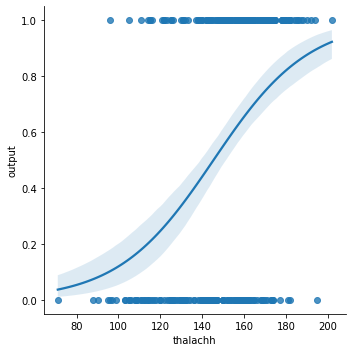

In [8]:
sns.lmplot('thalachh', 'output', data=herz, logistic=True)

Mit jedem einzelnen Herzschlag erhöht sich das Risiko für Herzinfarkt um 0.0440. Bei den -6,3915 Herzschlägen entspricht die Wahrscheinlichkeit aus statistischer Sicht für das Herzinfarkt 0%. Aber der Wert kann natürlich nicht verwendet werden, weil es kein -6.3915 Herzschlag gibt.

Da die Zahl von odds_ratio kleiner 1 ist, ist die Wahrscheinlichkeit höher in eine Gruppe, die durch Herzinfarkt bedroht ist, eingestuft zu werden.  

In [10]:
odds_ratio = np.exp(-6.3915)
odds_ratio

0.001675740704181725

Hier haben wir X und Y Werte für unser Model gebildet und die dann unten zerteilt.

In [12]:
X = herz[['thalachh']]
Y = herz[['output']]

Hier werden 25% zum Testdatensatz und 75% zum Trainingsdatensatz von dem gesamten Datensatz(303) verwendet.

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hier werden Vorhersagen gemacht, wer Herzinfarkt(1) bekommt und wer nicht(0) laut dem Model. das heißt, dass das nicht wahrhaftig sein kann.

In [14]:
Y_prediction = clf.predict(X_test)

Y_prediction

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

Es wird eine Konvusionsmatrix mit Hilfe von der Funktion confusion_matrix abgerufen. Diese zeigt an, dass 21 Untersuchten, die kein Risiko für Herzinfarkt haben, richtig identefiziert wurden. Bei den 9 Untersuchten wurde ein Herzinfarktrisiko diagnostiziert, obwohl sie tatsächlich über kein Risiko verfügen. Bei den 13 Untersuchten wurde kein Risiko entdeckt, obwohl sie eins haben. Bei den 33 Untersuchten, die ein Risiko haben, wurde es richtig erkannt. 

In [15]:
confusion_matrix(Y_test, clf.predict(X_test))

array([[21,  9],
       [13, 33]])

In diesem Abschnitt wird die Konfusionsmatrix in Prozentzahlen dargestellt. Dabei sind 27,63% tatsächlich von einem Risiko betroffen und werden auch richtig erkannt. Die 43,42% der in dem Testdatensatz Untersuchten haben wirklich ein Herzinfarktrisiko und werden richtig eingestuft. Bei 11,84% wird ein Risiko diagnostiziert, obwohl sie keins haben. Bei den 17,11% ist die Situation umgedreht.

In [16]:
confusion_matrix(Y_test, clf.predict(X_test))/len(Y_test)

array([[0.27631579, 0.11842105],
       [0.17105263, 0.43421053]])

Insgesamt ordnet das Modell 71,05% Untersuchten des Testdatensatzes richtig zur ihren tatsächlichen Klassen zu. 

In [17]:
train_prediction = clf.predict(X_test)
accuracy_score(Y_test, train_prediction)

0.7105263157894737

Zusammenfassend lässt sich sagen, dass das Modell im Großen und Ganzen gut anwendbar ist, obwohl es paar Nachteile aufweist. Vorallem ordnet das Modell ca. 29% zu den falschen Klassen zu. Jedoch ist die 71%-ige Wahrscheinlichkeit von richtiger Einstufung ein starker Vorteil von dem Modell. 